In [1]:
import cv2
import copy
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('lena.bmp')

### 1. Robert's Operator: 12

In [2]:
def robert(src_img, threshold):
    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            mag=0
            if (i+1<src_img.shape[0]) and (j+1<src_img.shape[1]):
                r1=-1*src_img[i,j,1]+src_img[i+1,j+1,1]
                r2=-1*src_img[i,j+1,1]+src_img[i+1,j,1]
                mag=math.sqrt(math.pow(r1,2)+math.pow(r2,2))
            if mag>=threshold:
                out[i,j]=0
            else:
                out[i,j]=255
    return out

In [3]:
rob=robert(img, 12)

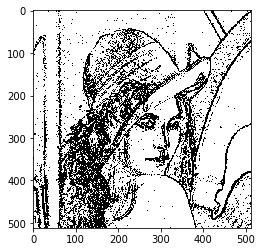

In [4]:
%matplotlib inline
plt.imshow(rob)

### 2. Prewitt's Edge Detector: 24

In [29]:
def prewitt(src_img, threshold):
    p1=[[-1,-1],[-1,0],[-1,1],[1,-1],[1,0],[1,1]]
    p1_weight=[-1,-1,-1,1,1,1]
    p2=[[-1,-1],[0,-1],[1,-1],[-1,1],[0,1],[1,1]]
    p2_weight=[-1,-1,-1,1,1,1]
    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            r1,r2,mag=0,0,0
            for k in range(len(p1)):
                if (i+p1[k][0]<src_img.shape[0]) and (j+p1[k][1]<src_img.shape[1]) and (i+p2[k][0]<src_img.shape[0]) \
                and (j+p2[k][1]<src_img.shape[1]):
                    r1+=p1_weight[k]*src_img[i+p1[k][0],j+p1[k][1],1]
                    r2+=p2_weight[k]*src_img[i+p2[k][0],j+p2[k][1],1]
                    mag=math.sqrt(math.pow(r1,2)+math.pow(r2,2))
            if mag>=threshold:
                out[i,j]=0
            else:
                out[i,j]=255
    return out

In [30]:
pre=prewitt(img, 24)

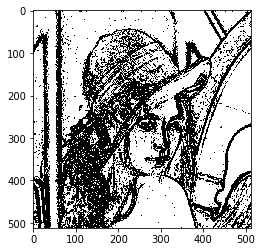

In [31]:
%matplotlib inline
plt.imshow(pre)

### 3. Sobel's Edge Detector: 38

In [35]:
def sobel(src_img, threshold):
    p1=[[-1,-1],[-1,0],[-1,1],[1,-1],[1,0],[1,1]]
    p1_weight=[-1,-2,-1,1,2,1]
    p2=[[-1,-1],[0,-1],[1,-1],[-1,1],[0,1],[1,1]]
    p2_weight=[-1,-2,-1,1,2,1]
    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            r1,r2,mag=0,0,0
            for k in range(len(p1)):
                if (i+p1[k][0]<src_img.shape[0]) and (j+p1[k][1]<src_img.shape[1]) and (i+p2[k][0]<src_img.shape[0]) \
                and (j+p2[k][1]<src_img.shape[1]):
                    r1+=p1_weight[k]*src_img[i+p1[k][0],j+p1[k][1],1]
                    r2+=p2_weight[k]*src_img[i+p2[k][0],j+p2[k][1],1]
                    mag=math.sqrt(math.pow(r1,2)+math.pow(r2,2))
            if mag>=threshold:
                out[i,j]=0
            else:
                out[i,j]=255
    return out

In [36]:
sob=sobel(img, 38)

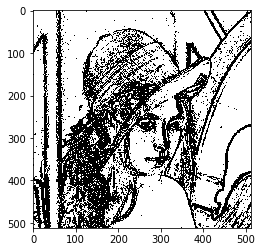

In [37]:
%matplotlib inline
plt.imshow(sob)

### 4. Frei and Chen's Gradient Operator: 30

In [38]:
def frei(src_img, threshold):
    p1=[[-1,-1],[-1,0],[-1,1],[1,-1],[1,0],[1,1]]
    p1_weight=[-1,-2**0.5,-1,1,2**0.5,1]
    p2=[[-1,-1],[0,-1],[1,-1],[-1,1],[0,1],[1,1]]
    p2_weight=[-1,-2**0.5,-1,1,2**0.5,1]
    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            r1,r2,mag=0,0,0
            for k in range(len(p1)):
                if (i+p1[k][0]<src_img.shape[0]) and (j+p1[k][1]<src_img.shape[1]) and (i+p2[k][0]<src_img.shape[0]) \
                and (j+p2[k][1]<src_img.shape[1]):
                    r1+=p1_weight[k]*src_img[i+p1[k][0],j+p1[k][1],1]
                    r2+=p2_weight[k]*src_img[i+p2[k][0],j+p2[k][1],1]
                    mag=math.sqrt(math.pow(r1,2)+math.pow(r2,2))
            if mag>=threshold:
                out[i,j]=0
            else:
                out[i,j]=255
    return out

In [39]:
fre=frei(img, 30)

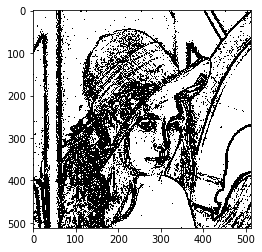

In [40]:
%matplotlib inline
plt.imshow(fre)

### 5. Kirsch's Compass Operator: 135

In [14]:
def kirsch(src_img, threshold):
    k_pos=[[-1,-1],[-1,0],[-1,1],[0,-1],[0,1],[1,-1],[1,0],[1,1]]
    k_weight=[[-3,-3,5,-3,5,-3,-3,5],
              [-3,5,5,-3,5,-3,-3,-3],
              [5,5,5,-3,-3,-3,-3,-3],
              [5,5,-3,5,-3,-3,-3,-3],
              [5,-3,-3,5,-3,5,-3,-3],
              [-3,-3,-3,5,-3,5,5,-3],
              [-3,-3,-3,-3,-3,5,5,5],
              [-3,-3,-3,-3,5,-3,5,5]
             ]
    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            kn=[]
            for kw in range(len(k_weight)):
                k_sum=0
                for k in range(len(k_pos)):
                    if (i+k_pos[k][0]<src_img.shape[0]) and (j+k_pos[k][1]<src_img.shape[1]):
                        k_sum+=k_weight[kw][k]*src_img[i+k_pos[k][0],j+k_pos[k][1],1]
                kn.append(k_sum)
            mag=max(kn)
            
            if mag>=threshold:
                out[i,j]=0
            else:
                out[i,j]=255
    return out

In [15]:
kir=kirsch(img, 135)

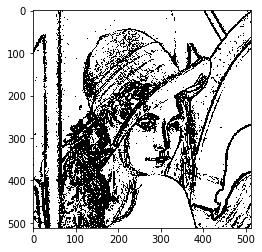

In [16]:
%matplotlib inline
plt.imshow(kir)

### 6. Robinson's Compass Operator: 43

In [17]:
def robinson(src_img, threshold):   
    r_w=[[-1,-2,-1,1,2,1],[1,2,1,-1,-2,-1]]
    r0_pos=[[-1,-1],[0,-1],[1,-1],[-1,1],[0,1],[1,1]]
    r1_pos=[[0,-1],[1,-1],[1,0],[-1,0],[-1,1],[0,1]]
    r2_pos=[[1,-1],[1,0],[1,1],[-1,-1],[-1,0],[-1,1]]
    r3_pos=[[1,0],[1,1],[0,1],[-1,0],[-1,-1],[0,-1]]

    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            rn=[]
            for rw in range(len(r_w)):
                r0_sum,r1_sum,r2_sum,r3_sum=0,0,0,0
                for r in range(len(r0_pos)):
                    if (i+r0_pos[r][0]<src_img.shape[0]) and (j+r0_pos[r][1]<src_img.shape[1]):
                        r0_sum+=r_w[rw][r]*src_img[i+r0_pos[r][0],j+r0_pos[r][1],1]
                    if (i+r1_pos[r][0]<src_img.shape[0]) and (j+r1_pos[r][1]<src_img.shape[1]):
                        r1_sum+=r_w[rw][r]*src_img[i+r1_pos[r][0],j+r1_pos[r][1],1]
                    if (i+r2_pos[r][0]<src_img.shape[0]) and (j+r2_pos[r][1]<src_img.shape[1]):
                        r2_sum+=r_w[rw][r]*src_img[i+r2_pos[r][0],j+r2_pos[r][1],1]
                    if (i+r3_pos[r][0]<src_img.shape[0]) and (j+r3_pos[r][1]<src_img.shape[1]):
                        r3_sum+=r_w[rw][r]*src_img[i+r3_pos[r][0],j+r3_pos[r][1],1]
                rn.append(r0_sum)
                rn.append(r1_sum)
                rn.append(r2_sum)
                rn.append(r3_sum)
            mag=max(rn)
            
            if mag>=threshold:
                out[i,j]=0
            else:
                out[i,j]=255
    return out

In [18]:
robin=robinson(img, 43)

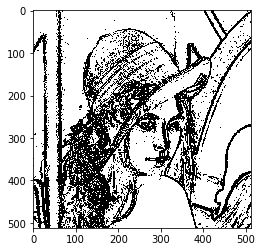

In [19]:
%matplotlib inline
plt.imshow(robin)

### 7. Nevatia-Babu 5x5 Operator: 12500

In [24]:
def nevatia(src_img, threshold):   
    pos=[[-2,-2],[-2,-1],[-2,0],[-2,1],[-2,2], 
         [-1,-2],[-1,-1],[-1,0],[-1,1],[-1,2], 
         [0,-2],[0,-1],[0,0],[0,1],[0,2], 
         [1,-2],[1,-1],[1,0],[1,1],[1,2], 
         [2,-2],[2,-1],[2,0],[2,1],[2,2]]
    weight=[[100,100,100,100,100,100,100,100,100,100,0,0,0,0,0,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100],
            [100,100,100,100,100,100,100,100,78,-32,100,92,0,-92,-100,32,-78,-100,-100,-100,-100,-100,-100,-100,-100],
            [100,100,100,32,-100,100,100,92,-78,-100,100,100,0,-100,-100,100,78,-92,-100,-100,100,-32,-100,-100,-100],
            [-100,-100,0,100,100,-100,-100,0,100,100,-100,-100,0,100,100,-100,-100,0,100,100,-100,-100,0,100,100],
            [-100,32,100,100,100,-100,-78,92,100,100,-100,-100,0,100,100,-100,-100,-92,78,100,-100,-100,-100,-32,100],
            [100,100,100,100,100,-32,78,100,100,100,-100,-92,0,92,100,-100,-100,-100,-78,32,-100,-100,-100,-100,-100]]

    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            rn=[]
            for w in range(len(weight)):
                pos_sum=0
                for p in range(len(pos)):
                    if (i+pos[p][0]<src_img.shape[0]) and (j+pos[p][1]<src_img.shape[1]):
                        pos_sum+=weight[w][p]*src_img[i+pos[p][0],j+pos[p][1],1]
                rn.append(pos_sum)
            mag=max(rn)
            
            if mag>=threshold:
                out[i,j]=0
            else:
                out[i,j]=255
    return out

In [27]:
nav=nevatia(img, 12500)

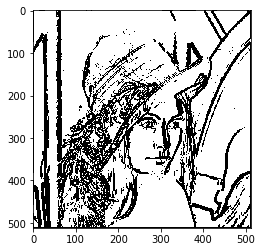

In [28]:
%matplotlib inline
plt.imshow(nav)